# Practical Example Of Linear Regression

### Importing Library

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression

sns.set()

### Loading Raw Data

In [2]:
raw_data = pd.read_csv("1.04. Real-life example.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Detrmine The Variable Of Intrest

In [5]:
data = raw_data.drop(['Model'],axis=1)

In [6]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing With Missing Values

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [10]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Exploring the PDF's

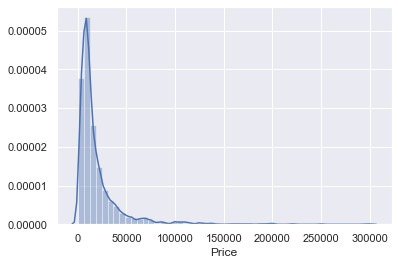

In [11]:
sns.distplot(data_no_mv['Price'])

In [12]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


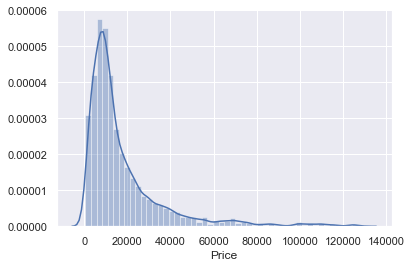

In [13]:
sns.distplot(data_1['Price'])

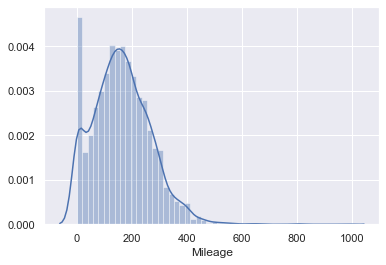

In [14]:
sns.distplot(data_no_mv['Mileage'])

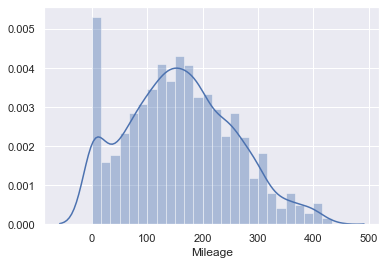

In [15]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage']<q]
sns.distplot(data_2['Mileage'])

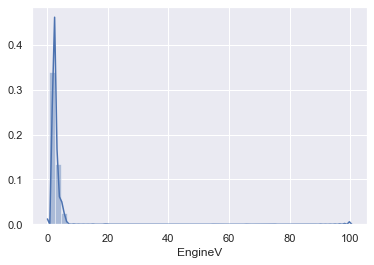

In [16]:
sns.distplot(data_no_mv['EngineV'])

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]

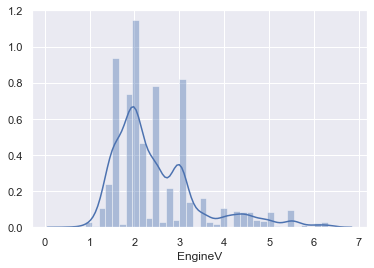

In [18]:
sns.distplot(data_3['EngineV'])

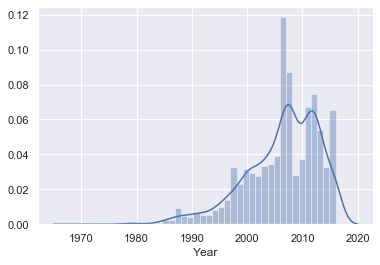

In [19]:
sns.distplot(data_no_mv['Year'])

In [20]:
q = data_no_mv['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

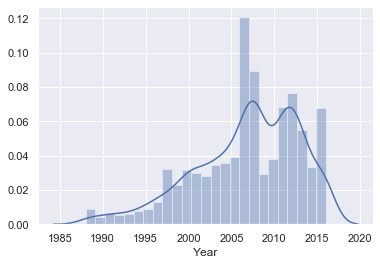

In [21]:
sns.distplot(data_4['Year'])

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


 ### Checking Ols Assumption 

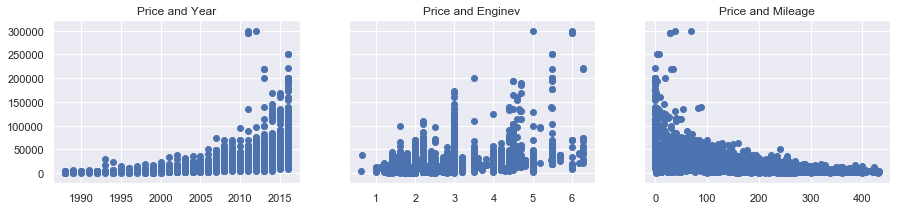

In [24]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and Enginev')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

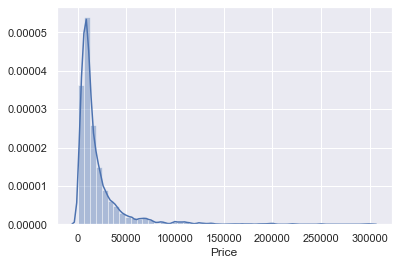

In [25]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


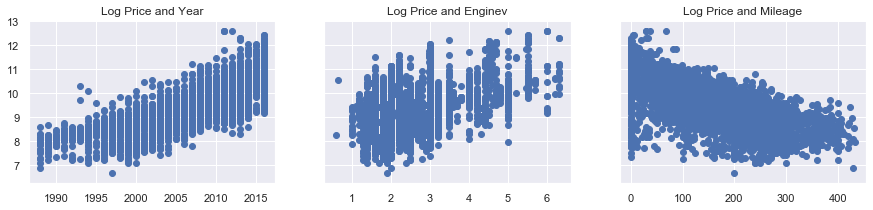

In [27]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and Enginev')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

### Multicolinatrity


In [28]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Price','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [30]:
vif

,VIF,Features
0,3.706109,Mileage
1,2.710930,Price
2,6.480095,EngineV


In [41]:
data_no_multicollinerity= data_cleaned.drop(['Year'],axis=1)
data_no_multicollinerity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


### Create Dummy variables

In [42]:
data_with_dummy = pd.get_dummies(data_no_multicollinerity,drop_first=True)

In [43]:
data_with_dummy.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [44]:
data_with_dummy.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [45]:
cols = ['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [46]:
data_prerocessed = data_with_dummy[cols]

In [47]:
data_prerocessed

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3903,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3904,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3905,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression

### Declear inputs and targets

In [48]:
targets = data_prerocessed['log_price']
inputs = data_prerocessed.drop(['log_price'],axis=1)

### Scale data set

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
inputs_scale = scaler.transform(inputs)

### Train test split

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_scale,targets,test_size=0.2,random_state = 101)

### Create Regression

In [55]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_hat = reg.predict(x_train)

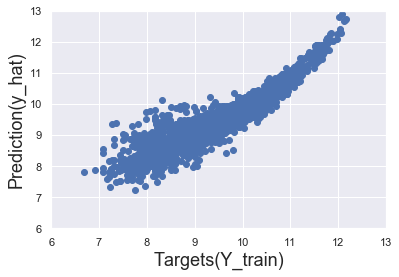

In [62]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(Y_train)',size=18)
plt.ylabel('Prediction(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals_pdf')

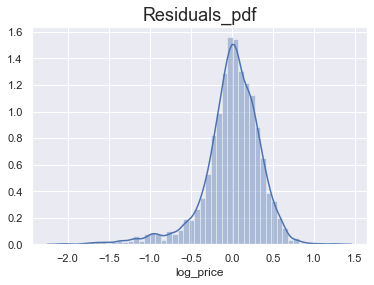

In [64]:
sns.distplot(y_train - y_hat)
plt.title('Residuals_pdf',size =18)

In [65]:
reg.score(x_train,y_train)

0.8479973108092679

### Finding weights and bias

In [66]:
reg.intercept_

9.440896222437043

In [67]:
reg.coef_

array([ 0.37556998, -0.30519251,  0.12348859,  0.01002892, -0.02054452,
       -0.09378764, -0.14420675, -0.02586401, -0.06415709, -0.10785229,
       -0.07036688, -0.13027784, -0.08735168, -0.11377903, -0.07996661,
       -0.02144992, -0.11514994,  0.28173925])

In [68]:
req_summary = pd.DataFrame(inputs.columns.values,columns=['Feature'])
req_summary['Weights'] = reg.coef_


In [69]:
req_summary

,Feature,Weights
0,Price,0.375570
1,Mileage,-0.305193
2,EngineV,0.123489
3,Brand_BMW,0.010029
4,Brand_Mercedes-Benz,-0.020545
5,Brand_Mitsubishi,-0.093788
6,Brand_Renault,-0.144207
7,Brand_Toyota,-0.025864
8,Brand_Volkswagen,-0.064157
9,Body_hatch,-0.107852


In [72]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing

In [73]:
y_hat_test = reg.predict(x_test)

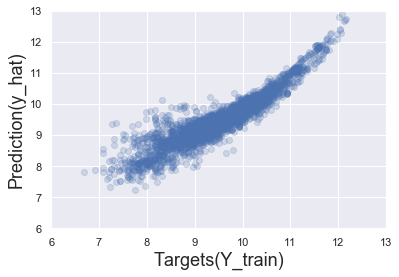

In [75]:
plt.scatter(y_train,y_hat,alpha =0.2)
plt.xlabel('Targets(Y_train)',size=18)
plt.ylabel('Prediction(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [76]:
df_pf = pd.DataFrame(y_hat_test,columns=['Prediction'])

In [81]:
df_pf['Target'] = np.exp(y_test)
df_pf.head

<bound method NDFrame.head of      Prediction   Target
0      8.890196      NaN
1      9.717387      NaN
2      9.415209      NaN
3      9.045553      NaN
4      9.654880  18300.0
..          ...      ...
777    9.797037      NaN
778   10.414669      NaN
779    9.699657      NaN
780    8.996825      NaN
781    8.891791   8900.0

[782 rows x 2 columns]>

In [83]:
y_test = y_test.reset_index(drop=True)

In [84]:
y_test.head()

0    9.210240
1    9.952230
2    9.384294
3    8.070906
4    9.539194
Name: log_price, dtype: float64

In [85]:
df_pf['Residuals']=df_pf['Target']-df_pf['Prediction']

In [86]:
df_pf['Difference%']=np.absolute(df_pf['Residuals']/df_pf['Target']*100)

In [89]:
df_pf.describe()

,Prediction,Target,Residuals,Difference%
count,782.000000,152.000000,152.000000,152.000000
mean,9.409337,20964.795724,20955.433819,99.900226
std,0.854736,27106.078841,27106.099621,0.093056
min,7.447382,1650.000000,1640.928132,99.450190
25%,8.893701,8000.000000,7990.809814,99.885217
50%,9.300806,12475.000000,12465.001610,99.924477
75%,9.893958,20150.000000,20141.146890,99.957209
max,13.203846,199999.000000,199989.360044,99.995180


In [91]:
pd.options.display.max_rows =999
pd.set_option('display.float_format',lambda x :'%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residuals,Difference%
55,9.07,1650.00,1640.93,99.45
366,8.40,1700.00,1691.60,99.51
415,11.45,2450.00,2438.55,99.53
586,11.29,2800.00,2788.71,99.60
587,8.34,2200.00,2191.66,99.62
376,9.31,2900.00,2890.69,99.68
62,9.35,3000.00,2990.65,99.69
184,9.18,3000.00,2990.82,99.69
555,8.99,3100.00,3091.01,99.71
429,8.64,3149.25,3140.61,99.73
